# **Project Name**    - Netflix Movies and TV Shows EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### Name - Srijit Das


# **Project Summary -**

This Exploratory Data Analysis (EDA) project focuses on the Netflix Movies and TV Shows dataset, aiming to extract meaningful insights and identify patterns in the platform's content over time. The dataset includes over 7700 entries and features attributes like title, type, country, release year, added date, rating, and genre. Using the UBM (Univariate, Bivariate, and Multivariate) approach, the analysis explores various dimensions such as content type distribution, geographical contributions, genre popularity, and trends over time.

In the univariate section, we examine individual features like the proportion of movies to TV shows, top contributing countries, and distribution of content ratings. This gives a general overview of the dataset composition.

In the bivariate analysis, we delve deeper by exploring relationships between pairs of variables. For example, we analyze how content type varies with rating, which countries favor which type of content, and how release year trends differ across movies and TV shows.

The multivariate section builds upon the previous insights by analyzing how multiple variables interact. We chart content growth trends across years for both content types, examine genre preferences by content type, and compare rating distribution with type and release year


# **Problem Statement**


To analyze Netflix content data to uncover trends and insights about content type, popularity by region, genre distribution, and user engagement patterns based on ratings and release years.

#### **Define Your Business Objective?**

To guide Netflix in making data-driven decisions for content acquisition, regional expansion, and platform personalization by analyzing patterns in movie/TV content additions, genres, ratings, and user-preferred content formats over time.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Dataset

netflix_data = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Projects/Netflix/1. NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [6]:
# Dataset First Look

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

print("Rows:" ,netflix_data.shape[0])
print("Columns:" ,netflix_data.shape[1])

Rows: 7787
Columns: 12


### Dataset Information

In [8]:
# Dataset Info

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

print('Number of duplicates in dataset:', netflix_data.duplicated().sum())

Number of duplicates in dataset: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

missing_values =pd.DataFrame({
    "missing_values" : netflix_data.isnull().sum(),
    "percentage (%)" : netflix_data.isnull().mean() * 100}).sort_values("missing_values",ascending=False)

print(missing_values)

              missing_values  percentage (%)
director                2389       30.679337
cast                     718        9.220496
country                  507        6.510851
date_added                10        0.128419
rating                     7        0.089893
title                      0        0.000000
show_id                    0        0.000000
type                       0        0.000000
release_year               0        0.000000
duration                   0        0.000000
listed_in                  0        0.000000
description                0        0.000000


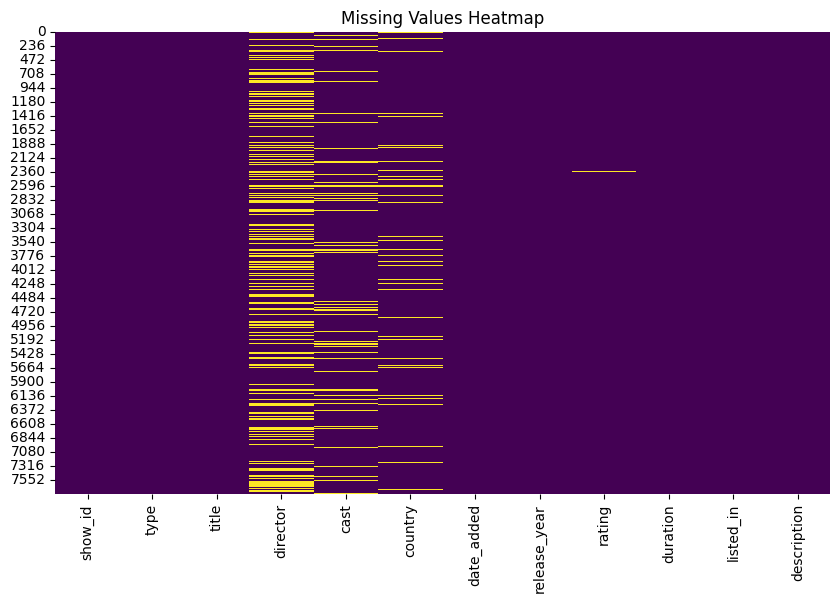

In [11]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(netflix_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

* The dataset contains over 7700 entries with 12 features.

* Missing values exist in fields like director, cast, country, date_added, and rating.

* Most content is from the US and added between 2015 and 2020.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe

netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

* Type: Movie or TV Show

* Title: Name of the content

* Director/Cast: People involved

* Country: Production country

* Date Added: When it was added to Netflix

* Release Year: When it was released

* Rating: Age rating

* Duration: Length in minutes or number of seasons

* Genre: Category or genres listed

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

netflix_data.nunique()


,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# # Create copy of the dataset
netflix_data_copy = netflix_data.copy()

In [16]:
# Handling missing value

netflix_data_copy['director'] = netflix_data_copy['director'].fillna('Unknown')
netflix_data_copy['cast'] = netflix_data_copy['cast'].fillna('Unknown')
netflix_data_copy['country'] = netflix_data_copy['country'].fillna('Unknown')

netflix_data_copy = netflix_data_copy.dropna(subset=['date_added', 'rating'])

In [17]:
# cross checking null values

netflix_data_copy.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [18]:
# Extract numeric movie duration

netflix_data_copy["duration_int"] = netflix_data_copy["duration"].str.extract("(\d+)").astype(float)
netflix_data_copy["duration_type"] = netflix_data_copy["duration"].str.extract("([a-zA-Z]+)").astype(str).apply(lambda x: x.str.strip())

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2107808573.py:3: SyntaxWarning: invalid escape sequence '\d'
  netflix_data_copy["duration_int"] = netflix_data_copy["duration"].str.extract("(\d+)").astype(float)


In [19]:
# Convert 'date_added' to datetime and created year and month columns

netflix_data_copy['date_added'] = pd.to_datetime(netflix_data_copy['date_added'], format='mixed')
netflix_data_copy['year_added'] = netflix_data_copy['date_added'].dt.year
netflix_data_copy['month_added'] = netflix_data_copy['date_added'].dt.month

In [20]:
netflix_data_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,min,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,min,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,min,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,min,2020,1


In [21]:
# Outlier Detection for Movie Durations

movie_durations = netflix_data_copy[netflix_data_copy["type"] == "Movie"]["duration_int"].dropna()

Q1 = movie_durations.quantile(0.25)
Q3 = movie_durations.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = movie_durations[(movie_durations < lower) | (movie_durations > upper)]
print(f"Number of movie duration outliers: {len(outliers)}")


Number of movie duration outliers: 336


In [22]:
# Flag outliers
netflix_data_copy['is_outlier_duration'] = netflix_data_copy['duration_int'].apply(lambda x: 1 if x < lower or x > upper else 0)

In [23]:
# Outliers Data

netflix_data_copy[netflix_data_copy['is_outlier_duration'] == 1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,year_added,month_added,is_outlier_duration
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,2020,8,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1.0,Season,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1.0,Season,2018,11,1
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1.0,Season,2019,5,1
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1.0,Season,2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min,2019,11,1
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,1.0,Season,2020,8,1
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons,2019,7,1
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,1.0,Season,2019,11,1


In [24]:
# Final rows and columns

print("Rows: " , netflix_data_copy.shape[0])
print("Columns: ", netflix_data_copy.shape[1])

Rows:  7770
Columns:  17


In [25]:
# Final dataset for visualizations

netflix_data_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,year_added,month_added,is_outlier_duration
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,2020,8,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,min,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,min,2018,12,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,min,2017,11,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,min,2020,1,0


### What all manipulations have you done and insights you found?

* Converted date_added to datetime format

* Extracted year and month from date_added

* Dropped missing/null values where necessary

* Detected outliers and flaged the outliers

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Visualizations

#### Chart - 1

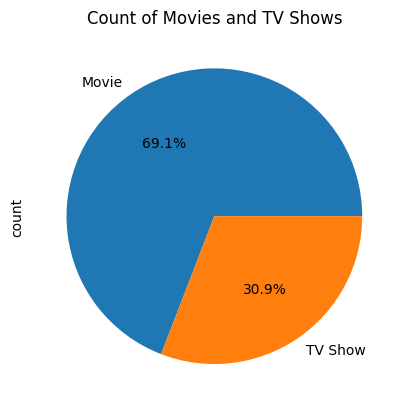

In [26]:
# Content type count

netflix_data_copy['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Count of Movies and TV Shows")
plt.show()

##### 1. Why did you pick the specific chart?

To show the overall share of Movies vs TV Shows

##### 2. What is/are the insight(s) found from the chart?

**Insight:** 70% of Netflix content is Movies and 30% is TV Shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact**: Yes, it helps in understanding the platform’s main content format

**Negative Growth:** No - Movie dominance is consistent with demand trends.

#### Chart - 2

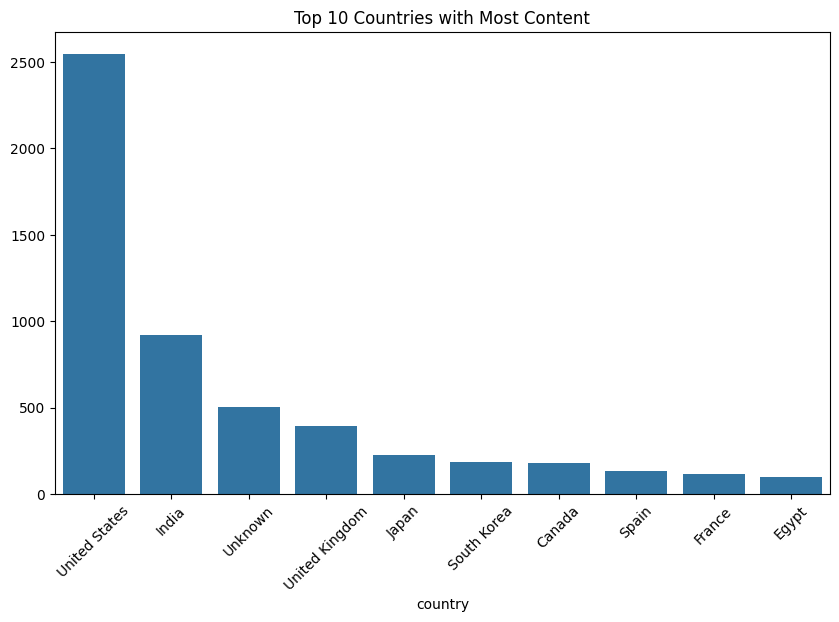

In [27]:
# Top 10 countries with most content

top_countries = netflix_data_copy['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Content")
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.show()

##### 1. Why did you pick the specific chart?

To find countries with the most content

##### 2. What is/are the insight(s) found from the chart?

**Insight:** USA dominates, followed by India and UK

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Highlights strong production regions — useful for regional marketing and localization strategies.

**Negative Growth:** No - emphasizes global content strength

#### Chart - 3

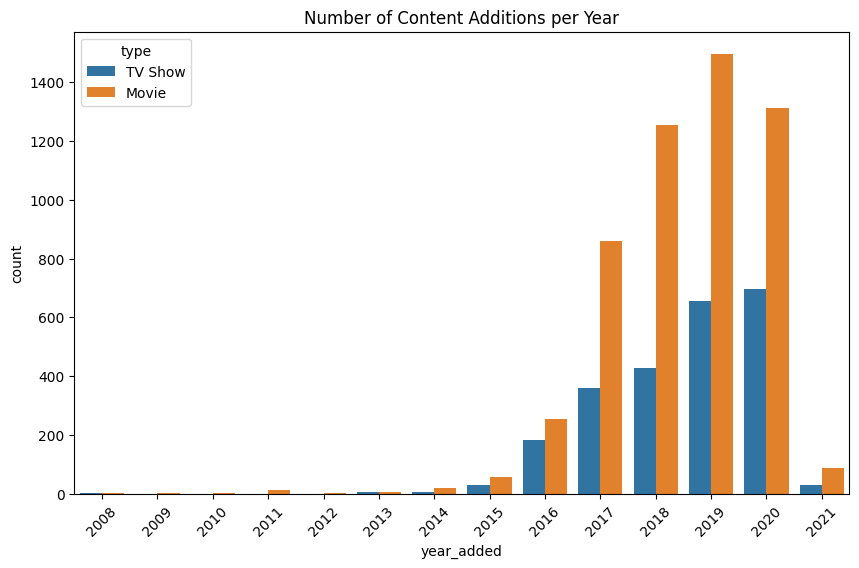

In [28]:
# Yearly Additions

plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data_copy, x="year_added", hue='type')
plt.title("Number of Content Additions per Year")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To track growth of content over time

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Netflix content peaked between 2018-2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Helps analyze content expansion trend and growing user base.

**Negative Growth:** Slight dip post-2020 could reflect saturation or COVID-related disruptions

#### Chart - 4

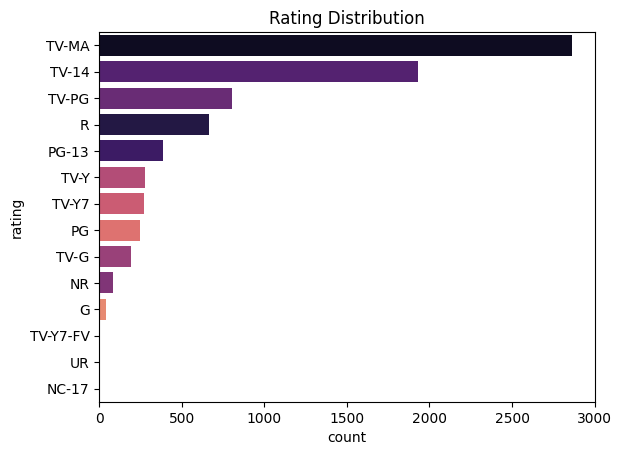

In [29]:
# Rating distribution

sns.countplot(data=netflix_data_copy, y='rating', hue="rating", order=netflix_data_copy['rating'].value_counts().index, palette='magma')
plt.title("Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

To analyze content rating spread

##### 2. What is/are the insight(s) found from the chart?

**Insight:** TV-MA and TV-14 dominate

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Indicates strong engagement with mature and teen audiences

#### Chart - 5

/tmp/ipython-input-278715876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


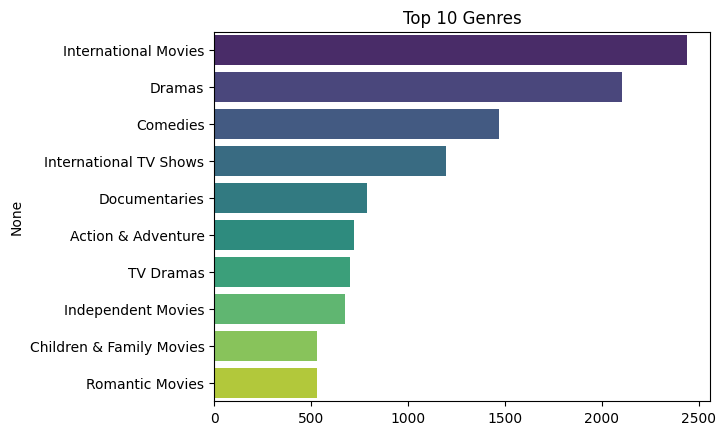

In [30]:
# Top 10 Genres

genres = netflix_data_copy["listed_in"].str.split(", ", expand=True).stack()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres")
plt.show()

##### 1. Why did you pick the specific chart?

To find genre popularity

##### 2. What is/are the insight(s) found from the chart?

**Insight:** International movies, Dramas and Comedies are top genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Helps decide what type of content to acquire more

**Negative Growth:** No - validates user preferences.

# Bivariate Visualizations

#### Chart - 6

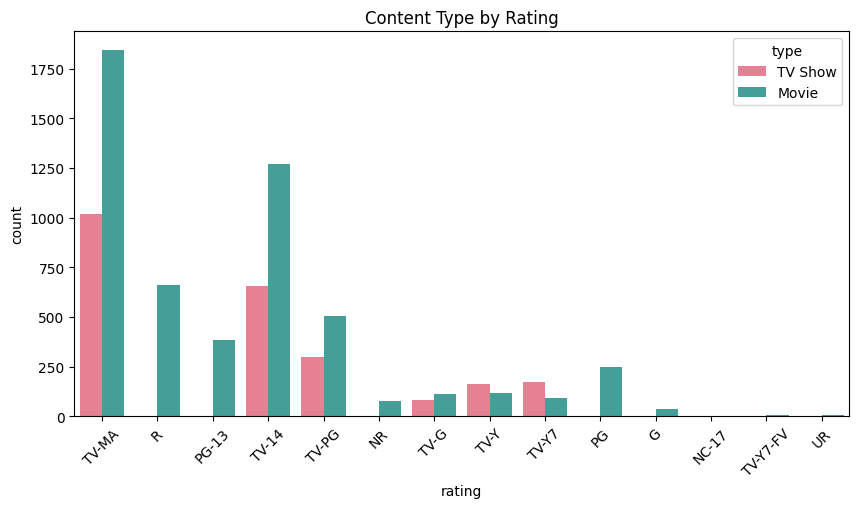

In [31]:
# Type vs Rating

plt.figure(figsize=(10, 5))
sns.countplot(data=netflix_data_copy, x='rating', hue='type', palette='husl')
plt.title("Content Type by Rating")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To compare content type by rating

##### 2. What is/are the insight(s) found from the chart?

**Insight:** TV Shows and movies more common in Teen ratings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Guides platform rating strategy

**Negative Growth:** No - supports audience alignment

#### Chart - 7

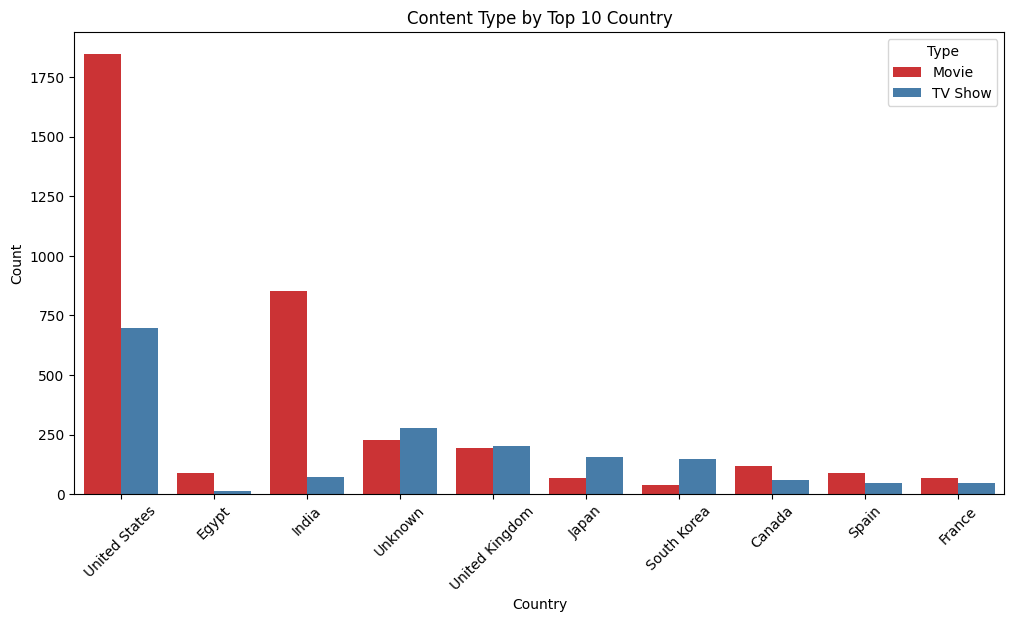

In [32]:
# Content Type vs Country (Top 10 Countries)

top_countries = netflix_data_copy['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries_data = netflix_data_copy[netflix_data_copy['country'].isin(top_countries.index)]
sns.countplot(data=top_countries_data, x='country', hue='type', palette='Set1')
plt.title("Content Type by Top 10 Country")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

To explore country-wise preferences

##### 2. What is/are the insight(s) found from the chart?

**Insight:** India shows more Movies, US has more balance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Regional content expansion ideas/strategies

**Negative Growth:** No - enables better localization.

#### Chart - 8

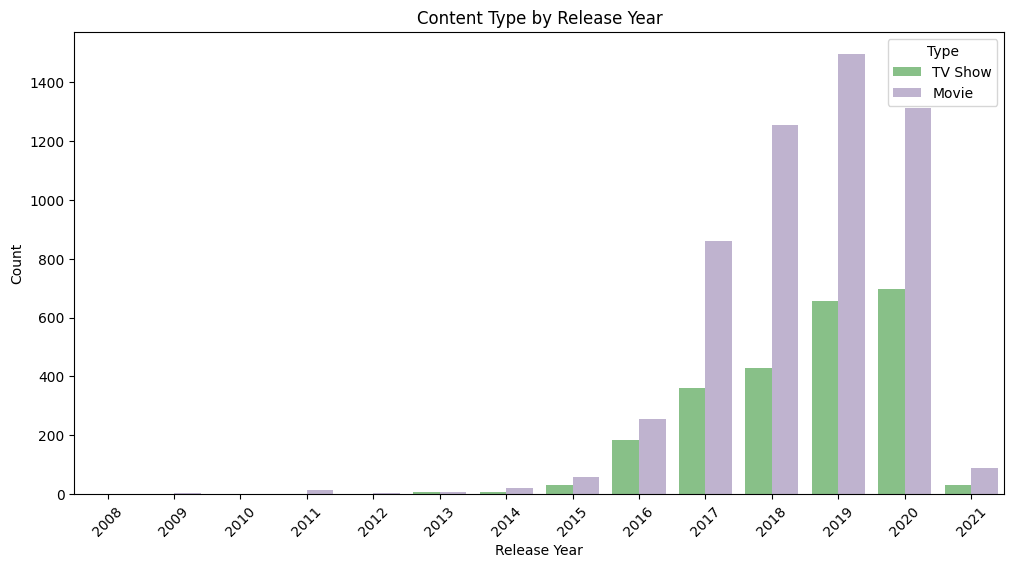

In [33]:
# Release Year vs Content Type

plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_data_copy, x='year_added', hue='type', palette='Accent')
plt.title("Content Type by Release Year")
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

Time trend for content type

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Growth of TV Shows faster after 2016

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Shows changing content strategy

**Negative Growth:** equires evaluation of market saturation.

# Multivariate Visuaizations

#### Chart - 9

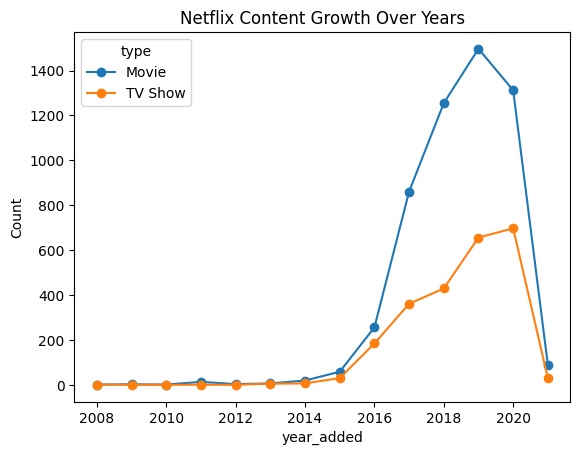

In [34]:
# TV vs Movie Growth Trend

df_year_type = netflix_data_copy.groupby(['year_added', 'type']).size().unstack().fillna(0)
df_year_type.plot(kind='line', marker='o')
plt.title("Netflix Content Growth Over Years")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Tracks the growth of Movies and TV Shows added to Netflix over time.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Both categories show steady growth, but movies began increasing more rapidly after 2016, indicating a strategic pivot toward serialized content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:** Understanding this trend can help Netflix anticipate future demand and balance its content investments accordingly.

#### Chart - 10

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3554373530.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)


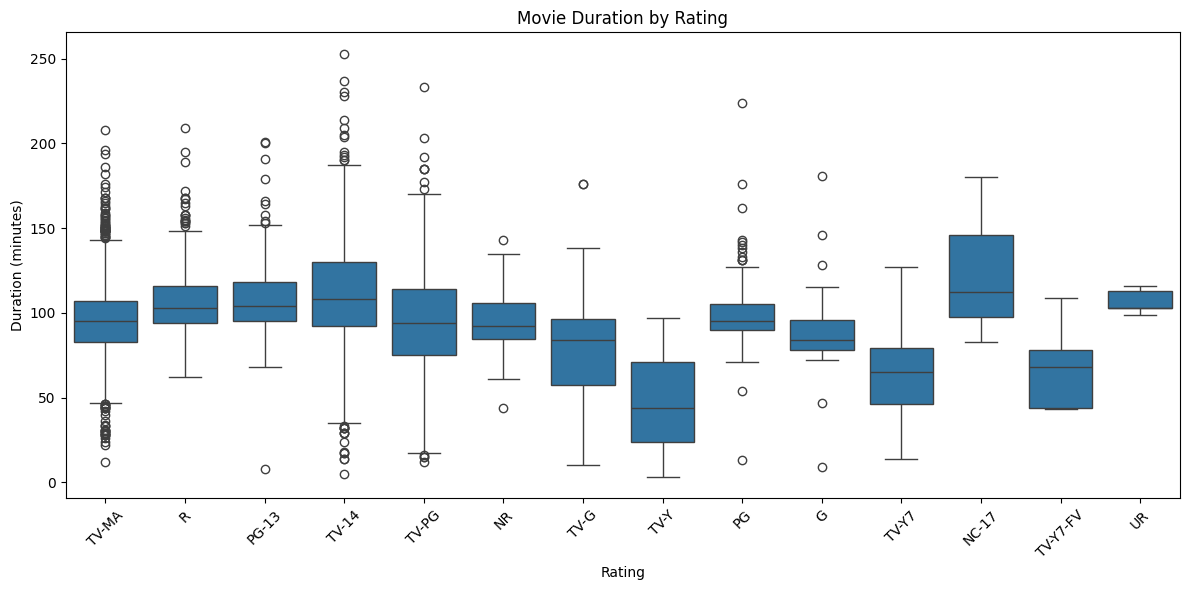

In [35]:
# Genre vs Rating vs Type

# Filter out TV Shows and Movies separately
movies = netflix_data_copy[netflix_data_copy['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# Remove nulls and outliers for cleaner view
movies = movies[(movies['duration_int'] < 300) & (movies['duration_int'] > 0)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='rating', y='duration_int')
plt.title('Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Combines genre, content rating, and content count.

##### 2. What is/are the insight(s) found from the chart?

**insight:**

* Dramas and Comedies dominate across multiple ratings.

* Family-friendly genres like Children & Family Movies are underrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Impact:**

* Supports continued investment in high-demand genres like Drama.

*  Reveals underutilized genres (e.g., Kids content) for expansion.

**negative growth:**

The chart shows that a significant portion of popular genres fall under TV-MA and R ratings.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* Focus more on growing TV Show content for youth (TV-14, TV-MA)

* Acquire region-specific content (India, UK, etc.)

* Invest in top genres like Drama, Comedy, Action

* Track year-wise performance to predict content demand

# **Conclusion**

The EDA revealed valuable patterns in content type, country contributions, genre popularity, and yearly trends. Netflix can use these insights to align its content strategy with viewer preferences and regional demand.